# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib notebook 
import utils as ut


## Exercice 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

<IPython.core.display.Javascript object>


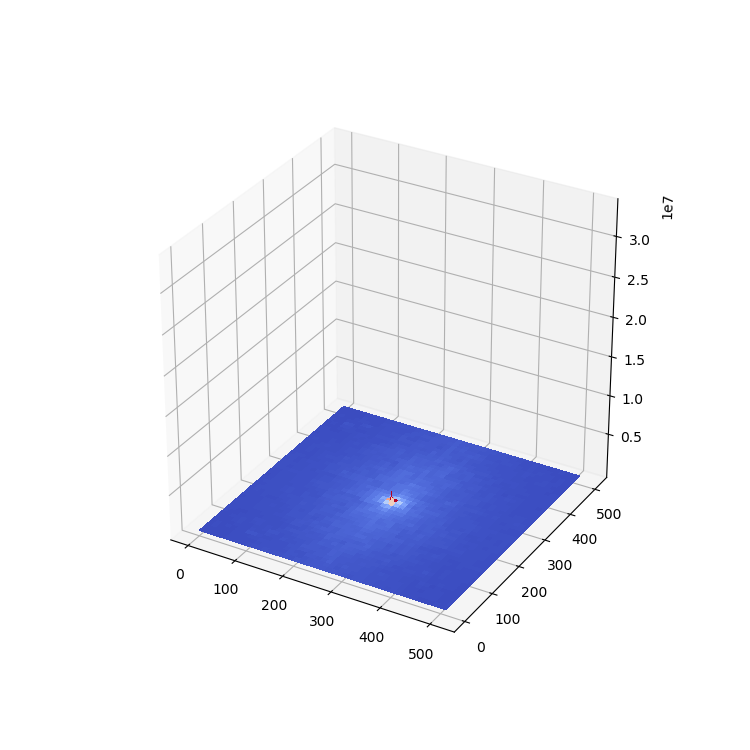

<IPython.core.display.Javascript object>


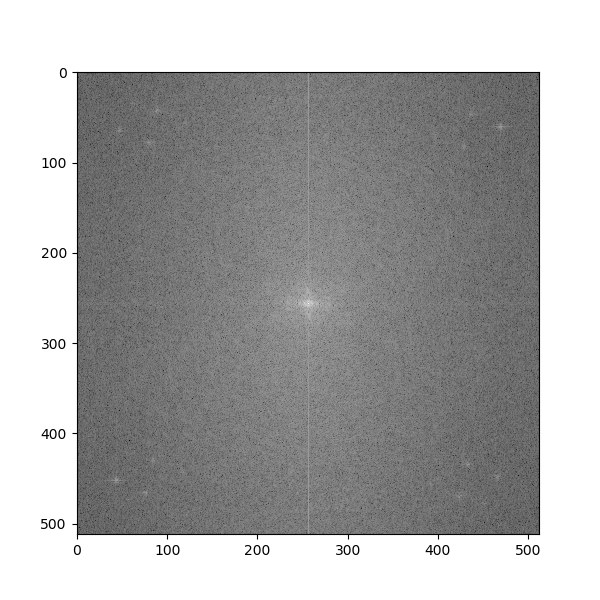

In [2]:
mandrill = np.array(Image.open('img/mandrill.png'))
ut.surf(ut.toVisualizeFT(ut.computeFT(mandrill)))
ut.imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill)))

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

In [3]:
def idealLowPassFilter(n,m,fc):
    x = np.arange(n)
    y = np.arange(m)
    X, Y = np.meshgrid(x, y)
    X = X - n//2
    Y = Y - m//2
    D = np.sqrt(X ** 2+Y ** 2)
    D = np.where(D <= fc,1,0)
    return D

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (function `ifft2()` from module `numpy.fft`
 - return the real part of filtered image

In [4]:
def lowPass(I,fc):
    FT = fftshift(ut.computeFT(I))
    filtered = FT * idealLowPassFilter(I.shape[0],I.shape[1],fc)
    return np.real(ifft2(ifftshift(filtered)))

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


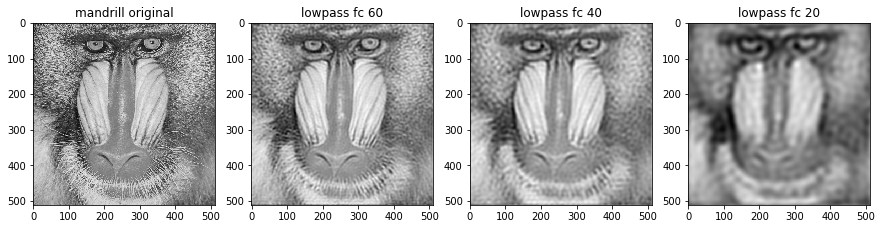

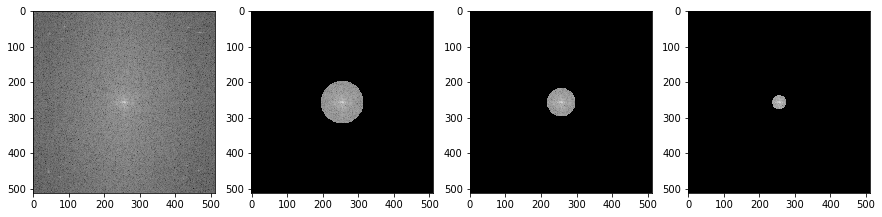

In [5]:
%matplotlib inline
mandrill20 = lowPass(mandrill,20)
mandrill40 = lowPass(mandrill,40)
mandrill60 = lowPass(mandrill,60)
fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(mandrill)
ax[0].set_title("mandrill original")
ax[1].imshow(mandrill60)
ax[1].set_title("lowpass fc 60")
ax[2].imshow(mandrill40)
ax[2].set_title("lowpass fc 40")
ax[3].imshow(mandrill20)
ax[3].set_title("lowpass fc 20")
plt.show()


fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill)))
ax[1].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill60)))
ax[2].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill40)))
ax[3].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill20)))
plt.show()

    en diminuant la fréquence on remarque que l'image devient de plus en plus flou et on pert plus de hautes frequences.
    on peut utiliser ce filtre pour faire du smoothing et supprimer le noise en plus la detection d'objets.

## Exercice 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

     on ajoute (d-1)/2 lignes a gauches et a droite , en haut et en bas avec d impair donc un padding de taille (d-1)/2.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

In [6]:
def imagePad(I,h):
    
    n, m = I.shape
    pad = int(h.shape[0]/2)
    out = np.full((n+2*pad,m+2*pad), 0.0)
    out[pad:pad+m, pad:pad+n] = I
    return out



3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [7]:
def conv2(I,h):
    iPad = imagePad(I,h)
    h = np.rot90(h, 2)
    pad = h.shape[0]
    out = np.zeros(I.shape)
    for x in range(I.shape[0]):
        for y in range(I.shape[1]):
            out[x, y] = (h * iPad[x: x+pad, y: y+pad]).sum()
    return out

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

In [8]:
def getMeanKer(n):
    return np.ones((n,n))/(n*n)

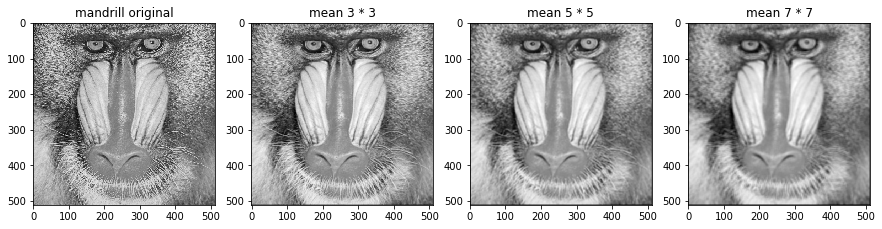

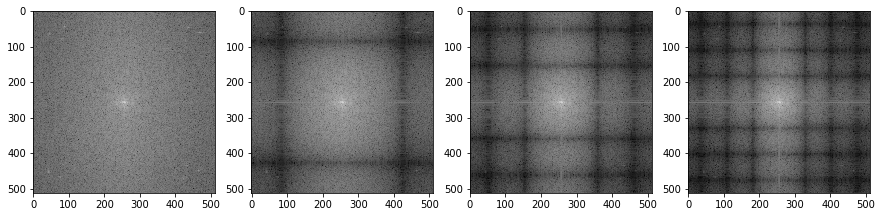

In [9]:
mandrill_mean3_3 = conv2(mandrill,getMeanKer(3))
mandrill_mean5_5 = conv2(mandrill,getMeanKer(5))
mandrill_mean7_7 = conv2(mandrill,getMeanKer(7))
fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(mandrill)
ax[0].set_title("mandrill original")
ax[1].imshow(mandrill_mean3_3)
ax[1].set_title("mean 3 * 3")
ax[2].imshow(mandrill_mean5_5)
ax[2].set_title("mean 5 * 5")
ax[3].imshow(mandrill_mean7_7)
ax[3].set_title("mean 7 * 7")
plt.show()


fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill)))
ax[1].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill_mean3_3)))
ax[2].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill_mean5_5)))
ax[3].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill_mean7_7)))
plt.show()

    on remarque que a chaque fois qu'on augmante le nombre de voisins on produit une image plus lisse en plus on visualise clairement le nombre de voisins utiliser dans la TF.

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

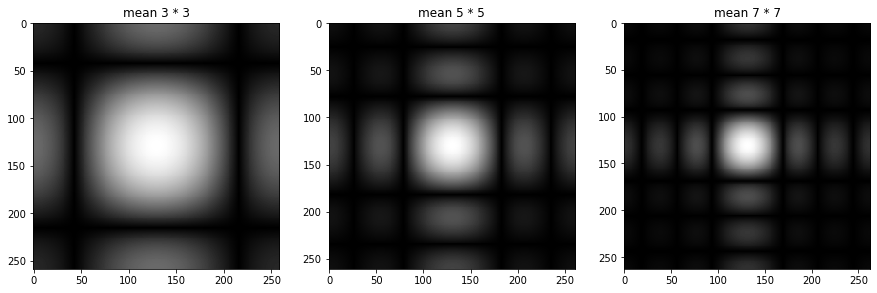

In [10]:

fig , ax = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(ut.toVisualizeLogFT(ut.computeFT(imagePad(getMeanKer(3),getMeanKer(256)))))
ax[0].set_title("mean 3 * 3")
ax[1].imshow(ut.toVisualizeLogFT(ut.computeFT(imagePad(getMeanKer(5),getMeanKer(256)))))
ax[1].set_title("mean 5 * 5")
ax[2].imshow(ut.toVisualizeLogFT(ut.computeFT(imagePad(getMeanKer(7),getMeanKer(256)))))
ax[2].set_title("mean 7 * 7")
plt.show()


6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

    l'expression analytique du filtre mean est sinc, et comme on voit que ce n'est pas bornée le filtre mean n'est pas ideal low pass.

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

In [11]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = np.int(3*sigma)
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()


In [12]:
for i in range(1,15):
    print("for {} gaussian kernel sigma = {} ".format(gaussianKernel(i/10).shape,i/10))


for (1, 1) gaussian kernel sigma = 0.1 
for (1, 1) gaussian kernel sigma = 0.2 
for (1, 1) gaussian kernel sigma = 0.3 
for (3, 3) gaussian kernel sigma = 0.4 
for (3, 3) gaussian kernel sigma = 0.5 
for (3, 3) gaussian kernel sigma = 0.6 
for (5, 5) gaussian kernel sigma = 0.7 
for (5, 5) gaussian kernel sigma = 0.8 
for (5, 5) gaussian kernel sigma = 0.9 
for (7, 7) gaussian kernel sigma = 1.0 
for (7, 7) gaussian kernel sigma = 1.1 
for (7, 7) gaussian kernel sigma = 1.2 
for (7, 7) gaussian kernel sigma = 1.3 
for (9, 9) gaussian kernel sigma = 1.4 


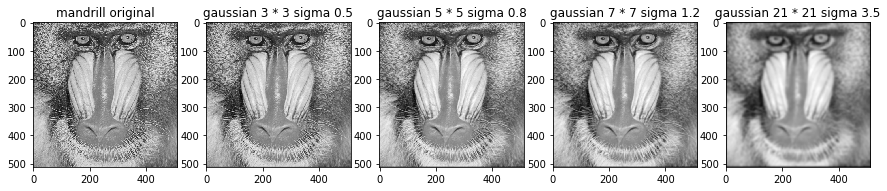

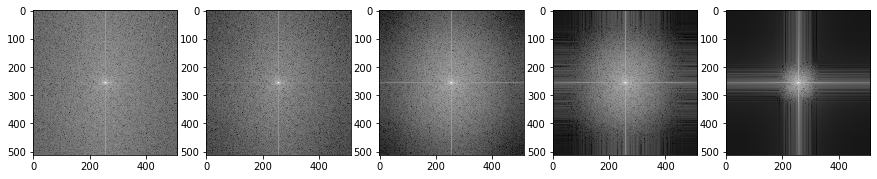

In [13]:
mandrill_gaussian3_3 = conv2(mandrill,gaussianKernel(0.5))
mandrill_gaussian5_5 = conv2(mandrill,gaussianKernel(0.8))
mandrill_gaussian7_7 = conv2(mandrill,gaussianKernel(1.2))
mandrill_gaussian21_21 = conv2(mandrill,gaussianKernel(3.5))
fig , ax = plt.subplots(1,5)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(mandrill)
ax[0].set_title("mandrill original")
ax[1].imshow(mandrill_gaussian3_3)
ax[1].set_title("gaussian 3 * 3 sigma 0.5")
ax[2].imshow(mandrill_gaussian5_5)
ax[2].set_title("gaussian 5 * 5 sigma 0.8")
ax[3].imshow(mandrill_gaussian7_7)
ax[3].set_title("gaussian 7 * 7 sigma 1.2")
ax[4].imshow(mandrill_gaussian21_21)
ax[4].set_title("gaussian 21 * 21 sigma 3.5")
plt.show()


fig , ax = plt.subplots(1,5)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill)))
ax[1].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill_gaussian3_3)))
ax[2].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill_gaussian5_5)))
ax[3].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill_gaussian7_7)))
ax[4].imshow(ut.toVisualizeLogFT(ut.computeFT(mandrill_gaussian21_21)))
plt.show()

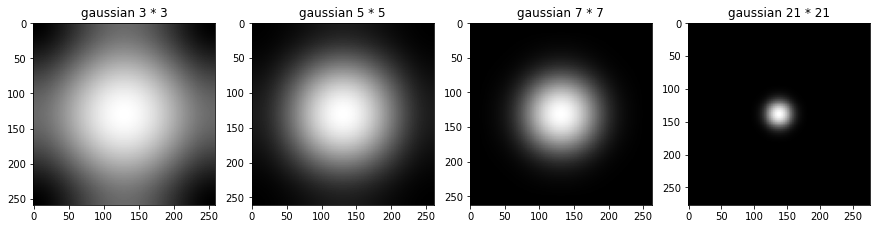

In [14]:

fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(ut.toVisualizeLogFT(ut.computeFT(imagePad(gaussianKernel(0.5),getMeanKer(256)))))
ax[0].set_title("gaussian 3 * 3")
ax[1].imshow(ut.toVisualizeLogFT(ut.computeFT(imagePad(gaussianKernel(0.8),getMeanKer(256)))))
ax[1].set_title("gaussian 5 * 5")
ax[2].imshow(ut.toVisualizeLogFT(ut.computeFT(imagePad(gaussianKernel(1.2),getMeanKer(256)))))
ax[2].set_title("gaussian 7 * 7")
ax[3].imshow(ut.toVisualizeLogFT(ut.computeFT(imagePad(gaussianKernel(3.5),getMeanKer(256)))))
ax[3].set_title("gaussian 21 * 21")
plt.show()


        l'affichage de la fonctions transfert du filtre gaussian a un forme d'un cercle qui est similaire au ideal low pass par contre elle est plus "smooth" avec le cut-off d'ou on produit des images plus reconnaissable avec les memes effets ( suppression noise ... etc). donc gaussian filter est proche d'un filtre ideal low pass mais n'est pas un comme c'est pas borné.

## Exercice 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

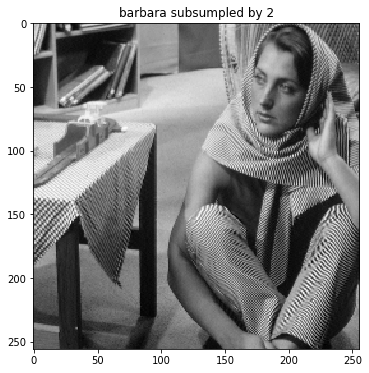

In [15]:
barbara = np.array(Image.open('img/barbara.png'))
barbaraSub2 = ut.subSample2(barbara)
ut.imshow(barbaraSub2,"barbara subsumpled by 2")

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

    pour utiliser le filtrage dans le domaine des frequences on doit calculer la TF centrée de l'image, appliquer un filtre h en multiplication element par element, decentré et appliquer la TF inverse de l'image.

In [16]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A


def lowPass2(I,filt):
    FT = fftshift(ut.computeFT(I))
    filtered = FT * filt
    return np.real(ifft2(ifftshift(filtered)))

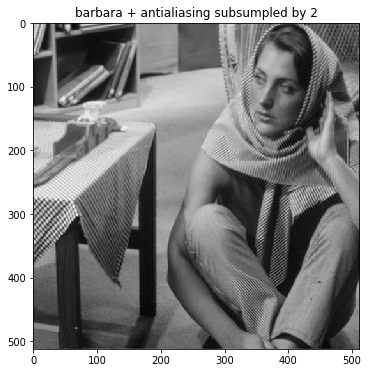

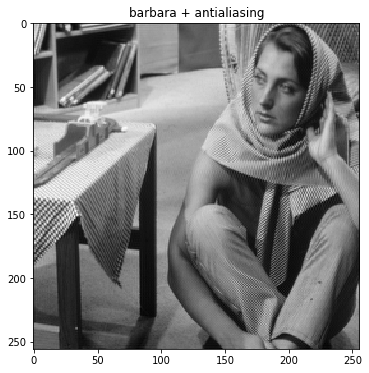

In [17]:
n, m = barbara.shape
barbara_filtered = lowPass2(barbara,antiAliasingFilter(n,m))
barbara_filteredSub2 = ut.subSample2(barbara_filtered)

ut.imshow(barbara_filtered,"barbara + antialiasing subsumpled by 2")
ut.imshow(barbara_filteredSub2,"barbara + antialiasing")

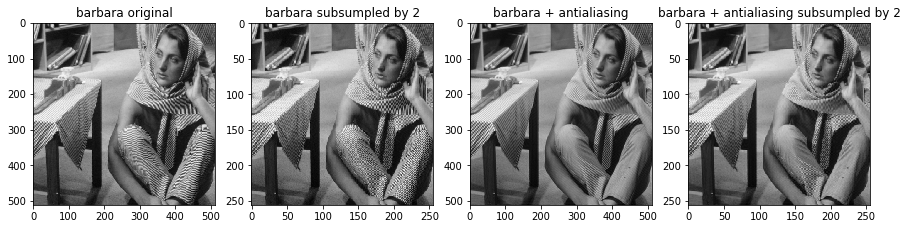

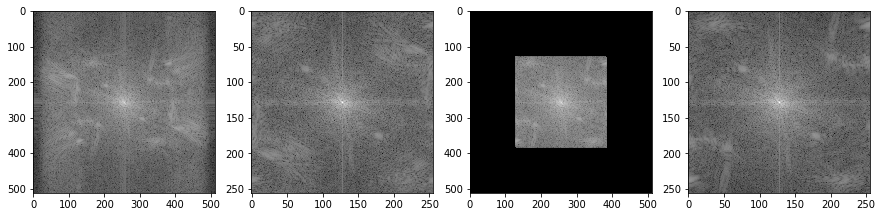

In [18]:
fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(barbara)
ax[0].set_title("barbara original")
ax[1].imshow(barbaraSub2)
ax[1].set_title("barbara subsumpled by 2")
ax[2].imshow(barbara_filtered)
ax[2].set_title("barbara + antialiasing")
ax[3].imshow(barbara_filteredSub2)
ax[3].set_title("barbara + antialiasing subsumpled by 2")
plt.show()


fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(ut.toVisualizeLogFT(ut.computeFT(barbara)))
ax[1].imshow(ut.toVisualizeLogFT(ut.computeFT(barbaraSub2)))
ax[2].imshow(ut.toVisualizeLogFT(ut.computeFT(barbara_filtered)))
ax[3].imshow(ut.toVisualizeLogFT(ut.computeFT(barbara_filteredSub2)))
plt.show()

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

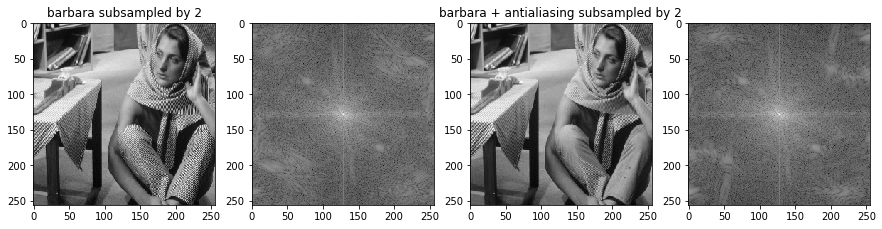

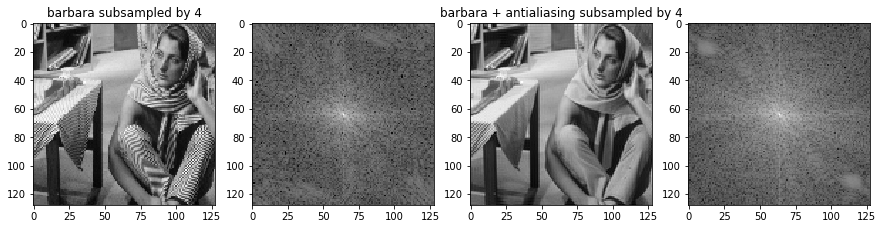

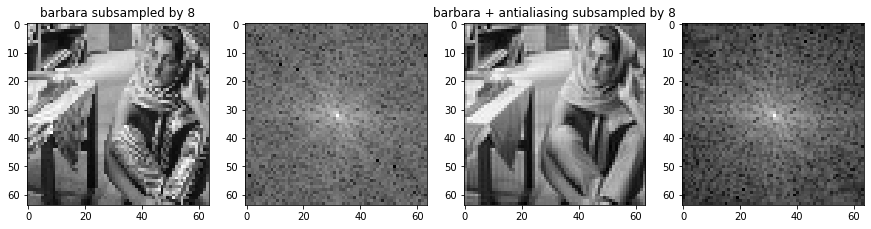

In [19]:
barbaraSub4 = ut.subSample2(barbaraSub2)
n, m = barbara_filteredSub2.shape
barbara_filtered = lowPass2(barbara_filteredSub2,antiAliasingFilter(n,m))
barbara_filteredSub4 = ut.subSample2(barbara_filtered)

barbaraSub8 = ut.subSample2(barbaraSub4)
n, m = barbara_filteredSub4.shape
barbara_filtered = lowPass2(barbara_filteredSub4,antiAliasingFilter(n,m))
barbara_filteredSub8 = ut.subSample2(barbara_filtered)

fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(barbaraSub2)
ax[0].set_title("barbara subsampled by 2")
ax[1].imshow(ut.toVisualizeLogFT(ut.computeFT(barbaraSub2)))
ax[2].imshow(barbara_filteredSub2)
ax[2].set_title("barbara + antialiasing subsampled by 2")
ax[3].imshow(ut.toVisualizeLogFT(ut.computeFT(barbara_filteredSub2)))
plt.show()


fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(barbaraSub4)
ax[0].set_title("barbara subsampled by 4")
ax[1].imshow(ut.toVisualizeLogFT(ut.computeFT(barbaraSub4)))
ax[2].imshow(barbara_filteredSub4)
ax[2].set_title("barbara + antialiasing subsampled by 4")
ax[3].imshow(ut.toVisualizeLogFT(ut.computeFT(barbara_filteredSub4)))
plt.show()


fig , ax = plt.subplots(1,4)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(barbaraSub8)
ax[0].set_title("barbara subsampled by 8")
ax[1].imshow(ut.toVisualizeLogFT(ut.computeFT(barbaraSub8)))
ax[2].imshow(barbara_filteredSub8)
ax[2].set_title("barbara + antialiasing subsampled by 8")
ax[3].imshow(ut.toVisualizeLogFT(ut.computeFT(barbara_filteredSub8)))
plt.show()





    pour mieux analyser les resultat on a utiliser la meme procedure pour subsample by 4 et 8
    dans les deux cas ( avec ou sans filtre) on perds des hautes frequences par exemple la texture du couvert de la table mais d'une facon differente, dans le cas d'echentillonage sans filtre l'image devient plus inreconnaisable a cause de l'aliasing car on ne peut pas correctement reconstruire l'image par contre dans le cas avec filtrage low pass, les hautes frequences sont deja supprimées donc l'echentillonage n'affecte pas trop l'image et donne un resultat plus smooth.

## Exercice 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images examine their shape. What difference there are between them?

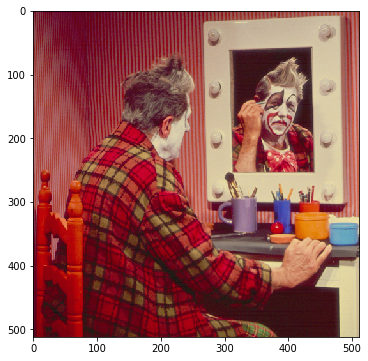

(512, 512, 3)


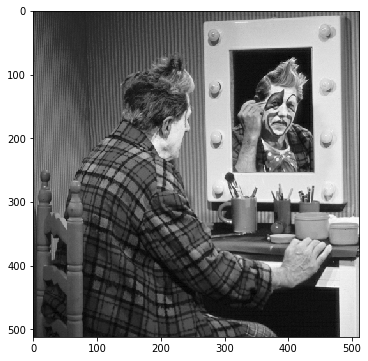

(512, 512)


In [20]:
I1 = np.array(Image.open('img/clown.bmp'))
I2 = np.array(Image.open('img/clown_lumi.bmp'))
ut.imshow(I1)
print(I1.shape)
ut.imshow(I2)
print(I2.shape)

    On remarque que l'image on couleur a 3 valeur dans chaque pixel contrairement au noir et blanc qui contient une valeur.

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

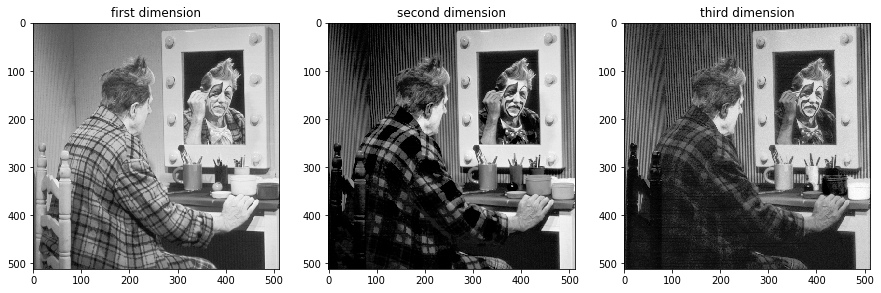

In [21]:
Ir = I1[:,:,0]
Ig = I1[:,:,1]
Ib = I1[:,:,2]

fig , ax = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(Ir)
ax[0].set_title("first dimension")
ax[1].imshow(Ig)
ax[1].set_title("second dimension")
ax[2].imshow(Ib)
ax[2].set_title("third dimension")

plt.show()


    chaque dimension contient le niveau de RGB, la premiere pour le rouge, la deuxieme vert et la troiseme bleu, en affichant chaque dimension on remarque que en fonction de la couleur les pixel prends un niveau de gris clair (haute valeur) pour chaque dimension ou le pixel est de cette couleur dans l'image originale, par exemple dans la premiere dimension l'image est plutot claire car on a trop de couleur rouge dans l'image originale. (et vice versa pour le niveau de gris foncé)

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

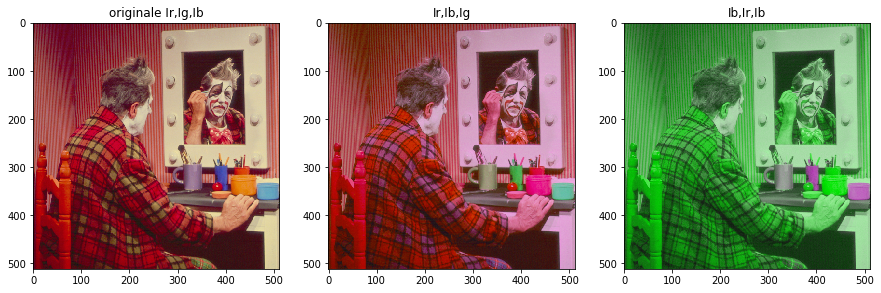

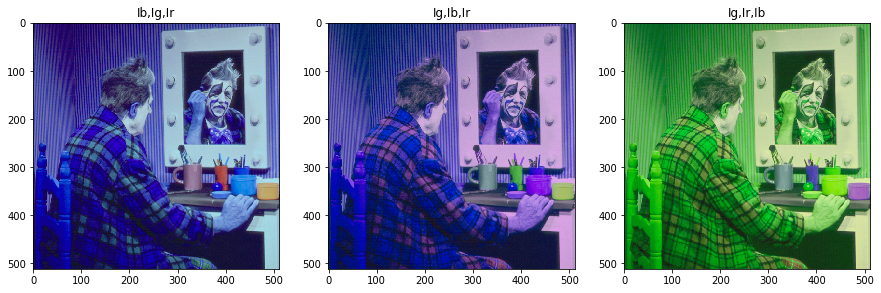

In [22]:
fig , ax = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(np.array((Ir.T,Ig.T,Ib.T)).T)
ax[0].set_title("originale Ir,Ig,Ib")
ax[1].imshow(np.array((Ir.T,Ib.T,Ig.T)).T)
ax[1].set_title("Ir,Ib,Ig")
ax[2].imshow(np.array((Ib.T,Ir.T,Ib.T)).T)
ax[2].set_title("Ib,Ir,Ib")

plt.show()

fig , ax = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(np.array((Ib.T,Ig.T,Ir.T)).T)
ax[0].set_title("Ib,Ig,Ir")
ax[1].imshow(np.array((Ig.T,Ib.T,Ir.T)).T)
ax[1].set_title("Ig,Ib,Ir")
ax[2].imshow(np.array((Ig.T,Ir.T,Ib.T)).T)
ax[2].set_title("Ig,Ir,Ib")

plt.show()

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

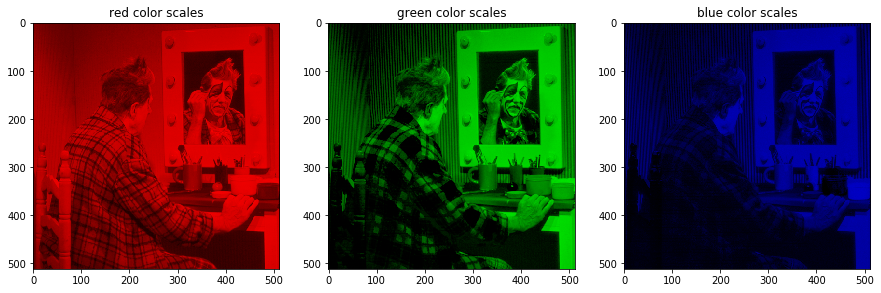

In [23]:
firstI = ut.normalizeImage(I1.copy(),0,1)
secondI = ut.normalizeImage(I1.copy(),0,1)
thirdI = ut.normalizeImage(I1.copy(),0,1)

firstI[:,:,1] = 0
firstI[:,:,2] = 0
secondI[:,:,0] = 0
secondI[:,:,2] = 0
thirdI[:,:,0] = 0
thirdI[:,:,1] = 0


fig , ax = plt.subplots(1,3)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].imshow(firstI)
ax[0].set_title("red color scales")
ax[1].imshow(secondI)
ax[1].set_title("green color scales")
ax[2].imshow(thirdI)
ax[2].set_title("blue color scales")

plt.show()